# HW1. iris dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm, datasets
%matplotlib inline
plt.style.use('ggplot')

In [2]:
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

In [3]:
C = 1.0 
svc = svm.SVC(kernel='linear', C=C).fit(X, y)

In [4]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [5]:
xx.shape, yy.shape

((164, 208), (164, 208))

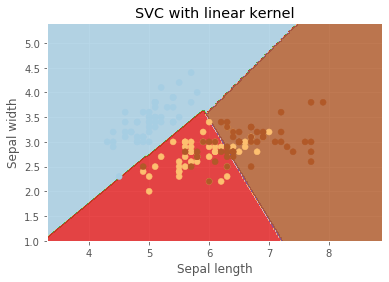

In [6]:
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel');

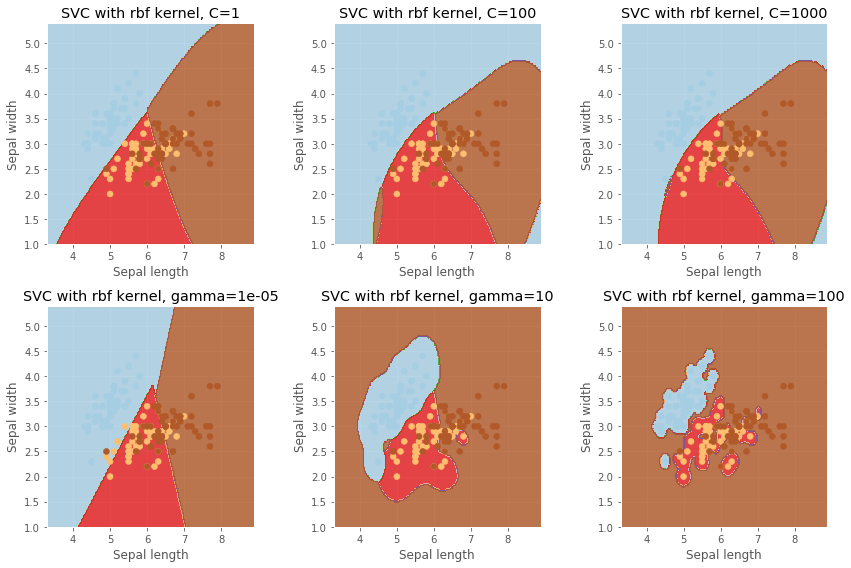

In [7]:
C_grid = [1, 100, 1000]
gamma_grid = [1e-5, 10, 100]
tuned = ['C', 'gamma']
f, axes = plt.subplots(2, 3, figsize=(12, 8))

for i in range(2):
    if not i:
        for idx1, C in enumerate(C_grid):
            svc = svm.SVC(C=C, kernel='rbf').fit(X, y)
            Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            axes[0][idx1].contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
            axes[0][idx1].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
            axes[0][idx1].set_xlabel('Sepal length')
            axes[0][idx1].set_ylabel('Sepal width')
            axes[0][idx1].set_title(f"SVC with rbf kernel, C={C}")
    else:
        for idx2, gamma in enumerate(gamma_grid):
            svc = svm.SVC(gamma=gamma, kernel='rbf').fit(X, y)
            Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            axes[1][idx2].contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
            axes[1][idx2].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
            axes[1][idx2].set_xlabel('Sepal length')
            axes[1][idx2].set_ylabel('Sepal width')
            axes[1][idx2].set_title(f"SVC with rbf kernel, gamma={gamma}")
            
f.tight_layout();

# HW2. weighted SVM

In [8]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, 
                           weights=[0.99], flip_y=0, random_state=4)

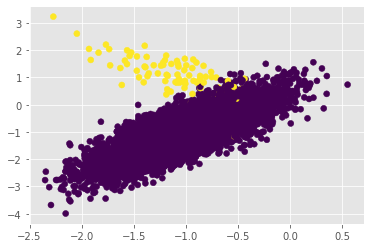

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=y);

한쪽에 치우친 데이터

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

model = svm.SVC(gamma='scale')
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.808


In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

model = svm.SVC(gamma='scale', class_weight='balanced')
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.967


## 시각화

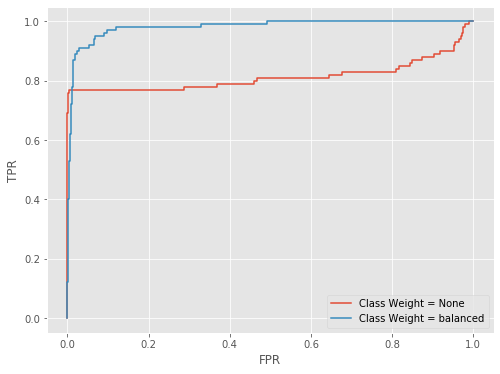

In [12]:
from sklearn.metrics import roc_curve

fig = plt.figure(figsize = (8, 6))
model = svm.SVC(gamma='scale')
model.fit(X, y)
fpr, tpr, _ = roc_curve(y, model.decision_function(X), pos_label=1)
plt.plot(fpr, tpr, label='Class Weight = None')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

model = svm.SVC(gamma='scale', class_weight='balanced')
model.fit(X, y)
fpr, tpr, _ = roc_curve(y, model.decision_function(X), pos_label=1)
plt.plot(fpr, tpr, label='Class Weight = balanced')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend();

그러니 타겟변수가 imbalanced된 경우에는 class_weight='balanced'로 지정해주어야 한다. <br>
물론 오분류에 대한 손실이 다르다면 사용자가 직접 manually하게 조정하는 것도 한 방법이다